In [ ]:
import numpy as np
import os
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#import dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sales_data.csv')

In [ ]:
#descriptive statistics
data.head()

,flag,gender,education,house_val,age,online,marriage,child,occupation,mortgage,house_owner,region,fam_income
0,Y,M,4. Grad,756460,1_Unk,N,NaN,U,Professional,1Low,NaN,Midwest,L
1,N,F,3. Bach,213171,7_>65,N,NaN,U,Professional,1Low,Owner,Northeast,G
2,N,M,2. Some College,111147,2_<=25,Y,NaN,Y,Professional,1Low,Owner,Midwest,J
3,Y,M,2. Some College,354151,2_<=25,Y,Single,U,Sales/Service,1Low,NaN,West,L
4,Y,F,2. Some College,117087,1_Unk,Y,Married,Y,Sales/Service,1Low,NaN,South,H


In [ ]:
data.columns

Index(['flag', 'gender', 'education', 'house_val', 'age', 'online', 'marriage',
       'child', 'occupation', 'mortgage', 'house_owner', 'region',
       'fam_income'],
      dtype='object')

In [ ]:
data.describe()

,house_val
count,4.000000e+04
mean,3.072138e+05
std,4.222146e+05
min,0.000000e+00
25%,8.065725e+04
50%,2.148720e+05
75%,3.937620e+05
max,9.999999e+06


In [ ]:
#include columns with object data type
data.describe(include=['object'])

,flag,gender,education,age,online,marriage,child,occupation,mortgage,house_owner,region,fam_income
count,40000,40000,39259,40000,40000,25973,40000,40000,40000,36623,40000,40000
unique,2,3,5,7,2,2,4,6,3,2,5,13
top,Y,M,2. Some College,5_<=55,Y,Married,Y,Professional,1Low,Owner,South,E
freq,20000,22019,11400,8103,27319,20891,18012,14936,29848,29232,15676,8432


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   flag         40000 non-null  object
 1   gender       40000 non-null  object
 2   education    39259 non-null  object
 3   house_val    40000 non-null  int64 
 4   age          40000 non-null  object
 5   online       40000 non-null  object
 6   marriage     25973 non-null  object
 7   child        40000 non-null  object
 8   occupation   40000 non-null  object
 9   mortgage     40000 non-null  object
 10  house_owner  36623 non-null  object
 11  region       40000 non-null  object
 12  fam_income   40000 non-null  object
dtypes: int64(1), object(12)
memory usage: 4.0+ MB


In [ ]:
data[(data['gender'] == 'F') & (data['flag'] == 'Y')]

,flag,gender,education,house_val,age,online,marriage,child,occupation,mortgage,house_owner,region,fam_income
4,Y,F,2. Some College,117087,1_Unk,Y,Married,Y,Sales/Service,1Low,NaN,South,H
5,Y,F,3. Bach,248694,6_<=65,Y,Married,N,Professional,2Med,Owner,West,G
11,Y,F,3. Bach,245686,4_<=45,N,Married,U,Blue Collar,1Low,Owner,South,E
12,Y,F,2. Some College,360587,5_<=55,Y,Married,Y,Professional,3High,Owner,Midwest,J
14,Y,F,3. Bach,380431,6_<=65,Y,NaN,U,Professional,1Low,Owner,South,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39969,Y,F,2. Some College,130605,6_<=65,Y,NaN,N,Sales/Service,1Low,Owner,South,G
39975,Y,F,1. HS,0,7_>65,Y,Married,N,Retired,1Low,Owner,South,C
39983,Y,F,3. Bach,174650,5_<=55,Y,Married,Y,Professional,1Low,Owner,South,D
39985,Y,F,4. Grad,632200,3_<=35,Y,NaN,Y,Professional,3High,Owner,South,K


In [ ]:
data["flag"].value_counts()

Y    20000
N    20000
Name: flag, dtype: int64

In [ ]:
data["education"].value_counts()

2. Some College    11400
3. Bach             9267
1. HS               8828
4. Grad             5916
0. <HS              3848
Name: education, dtype: int64

In [ ]:
data["occupation"].value_counts()


Professional     14936
Sales/Service    11767
Blue Collar       6621
Retired           4341
Others            2006
Farm               329
Name: occupation, dtype: int64

In [ ]:
data["region"].value_counts()

South        15676
West          8725
Midwest       8107
Northeast     7247
Rest           245
Name: region, dtype: int64

In [ ]:
data["marriage"].value_counts()

Married    20891
Single      5082
Name: marriage, dtype: int64

<AxesSubplot:>

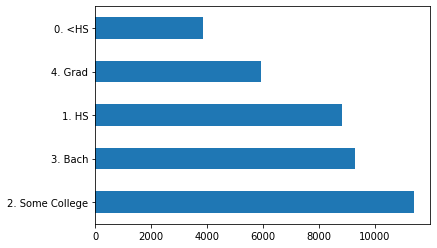

In [ ]:
data.education.value_counts().plot.barh()

<AxesSubplot:>

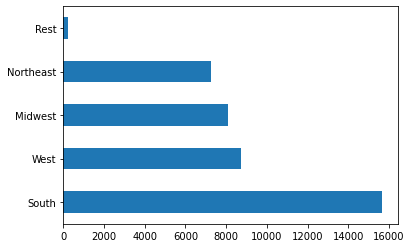

In [ ]:
data.region.value_counts().plot.barh()

<AxesSubplot:>

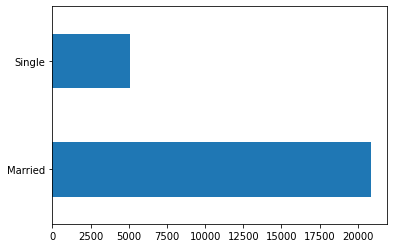

In [ ]:
data.marriage.value_counts().plot.barh()

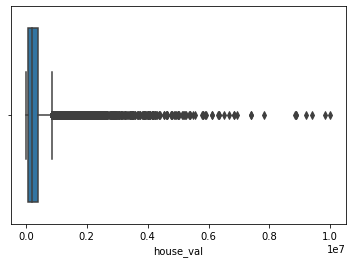

In [ ]:
sns.boxplot( x=data["house_val"] );
plt.show()

In [ ]:
data.isna().any()

flag           False
gender         False
education       True
house_val      False
age            False
online         False
marriage        True
child          False
occupation     False
mortgage       False
house_owner     True
region         False
fam_income     False
dtype: bool

In [ ]:
print("Missing values distribution: ")
print(data.isnull().mean())
print("")

Missing values distribution: 
flag           0.000000
gender         0.000000
education      0.018525
house_val      0.000000
age            0.000000
online         0.000000
marriage       0.350675
child          0.000000
occupation     0.000000
mortgage       0.000000
house_owner    0.084425
region         0.000000
fam_income     0.000000
dtype: float64



In [ ]:
education_nan_count = data['education'].isna().sum()

In [ ]:
marriage_nan_count = data['marriage'].isna().sum()

In [ ]:
house_owner_nan_count = data ['house_owner'].isna().sum()

In [ ]:
print("The number of values missing from the education column is: " + str(education_nan_count))
print("The number of values missing from the marriage column is: " + str(marriage_nan_count))
print("The number of values missing from the house owner column: " + str(house_owner_nan_count))

The number of values missing from the education column is: 741
The number of values missing from the marriage column is: 14027
The number of values missing from the house owner column: 3377


In [ ]:
data = data.drop('online', axis=1)

In [ ]:
#encode ordinal variables
enc = OrdinalEncoder()
#return an array of numerical values
data["fam_income"] = enc.fit_transform(data[["fam_income"]])

data["mortgage"] = enc.fit_transform(data[["mortgage"]])

data["fam_income"].value_counts()

data["mortgage"].value_counts()



0.0    29848
2.0     5349
1.0     4803
Name: mortgage, dtype: int64

In [ ]:
count = (data['house_val'] == 0).sum()

In [ ]:
print('Count of zeros in House Value column is : ', count)

Count of zeros in House Value column is :  7696


In [ ]:
#deal with zeros in house value column

data['house_val'].mean()

data['house_val'].median()

data['house_val']=data['house_val'].replace(0,data['house_val'].median())

In [ ]:
#replace symbols in age and education
data['age'] = data['age'].str.replace('_', '').str.replace('<','').str.replace('=', '').str.replace('>','')

data['education'] = data['education'].str.replace('.', '').str.replace('<','')


<ipython-input-249-7f6e18968611>:4: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [ ]:
data['age'] = data['age'].replace("1Unk", 1)
data['age'] = data['age'].replace("225", 2)
data['age'] = data['age'].replace("335", 3)
data['age'] = data['age'].replace("445", 4)
data['age'] = data['age'].replace("555", 5)
data['age'] = data['age'].replace("665", 6)
data['age'] = data['age'].replace("765", 7)

data['age'].mean()


4.1138

In [ ]:

data['gender'] = data['gender'].replace("M", 0)
data['gender'] = data['gender'].replace("F", 1)
data['gender'] = data['gender'].replace("U", 00)

In [ ]:
data['marriage'] = data['marriage'].replace("Single", 0)
data['marriage'] = data['marriage'].replace("Married", 1)

In [ ]:
data['child'] = data['child'].replace("N", 0)
data['child'] = data['child'].replace("0", 0)
data['child'] = data['child'].replace("Y", 1)
data['child'] = data['child'].replace("U", 00)

In [ ]:

data['house_owner'] = data['house_owner'].replace("Renter", 0)
data['house_owner'] = data['house_owner'].replace("Owner", 1)

In [ ]:
#education
data['education'] = data['education'].replace("0 HS", 0)
data['education'] = data['education'].replace("1 HS", 1)
data['education'] = data['education'].replace("2 Some College", 2)
data['education'] = data['education'].replace("3 Bach", 3)
data['education'] = data['education'].replace("4 Grad", 4)

In [ ]:

#occupation encode others as 00
data['occupation'] = data['occupation'].replace("Farm", 0)
data['occupation'] = data['occupation'].replace("Retired", 1)
data['occupation'] = data['occupation'].replace("Blue Collar", 2)
data['occupation'] = data['occupation'].replace("Sales/Service", 3)
data['occupation'] = data['occupation'].replace("Professional", 4)
data['occupation'] = data['occupation'].replace("Others", 5)


In [ ]:

#region, encode rest as 00
data['region'] = data['region'].replace("South", 0)
data['region'] = data['region'].replace("West", 1)
data['region'] = data['region'].replace("Midwest", 2)
data['region'] = data['region'].replace("Northeast", 3)
data['region'] = data['region'].replace("Rest", 00)


In [ ]:
#flag
data['flag'] = data['flag'].replace("N", 0)
data['flag'] = data['flag'].replace("Y", 1)


In [ ]:
#handle missing values
data['education'].fillna('U', inplace = True)
data['marriage'].fillna('U', inplace = True)
data['house_owner'].fillna('U', inplace = True)


In [ ]:
#replace all unknowns with 00
data['education']= data['education'].replace("U", 00)
data['marriage']= data['marriage'].replace("U", 00)
data['house_owner']= data['house_owner'].replace("U", 00)

In [ ]:
data.isna().any()

flag           False
gender         False
education      False
house_val      False
age            False
marriage       False
child          False
occupation     False
mortgage       False
house_owner    False
region         False
fam_income     False
dtype: bool

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   flag         40000 non-null  int64  
 1   gender       40000 non-null  int64  
 2   education    40000 non-null  float64
 3   house_val    40000 non-null  int64  
 4   age          40000 non-null  int64  
 5   marriage     40000 non-null  float64
 6   child        40000 non-null  int64  
 7   occupation   40000 non-null  int64  
 8   mortgage     40000 non-null  float64
 9   house_owner  40000 non-null  float64
 10  region       40000 non-null  int64  
 11  fam_income   40000 non-null  float64
dtypes: float64(5), int64(7)
memory usage: 3.7 MB


In [ ]:
#convert floats to integer
data['education'] = pd.to_numeric(data['education']).astype('Int64')
data['marriage'] = pd.to_numeric(data['marriage']).astype('Int64')
data['house_owner'] = pd.to_numeric(data['house_owner']).astype('Int64')
data['fam_income'] = pd.to_numeric(data['fam_income']).astype('Int64')
data['mortgage'] = pd.to_numeric(data['mortgage']).astype('Int64')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   flag         40000 non-null  int64
 1   gender       40000 non-null  int64
 2   education    40000 non-null  Int64
 3   house_val    40000 non-null  int64
 4   age          40000 non-null  int64
 5   marriage     40000 non-null  Int64
 6   child        40000 non-null  int64
 7   occupation   40000 non-null  int64
 8   mortgage     40000 non-null  Int64
 9   house_owner  40000 non-null  Int64
 10  region       40000 non-null  int64
 11  fam_income   40000 non-null  Int64
dtypes: Int64(5), int64(7)
memory usage: 3.9 MB


In [ ]:
data.head()

,flag,gender,education,house_val,age,marriage,child,occupation,mortgage,house_owner,region,fam_income
0,1,0,4,756460,1,0,0,4,0,0,2,11
1,0,1,3,213171,7,0,0,4,0,1,3,6
2,0,0,2,111147,2,0,1,4,0,1,2,9
3,1,0,2,354151,2,0,0,3,0,0,1,11
4,1,1,2,117087,1,1,1,3,0,0,0,7


<AxesSubplot:xlabel='flag', ylabel='education'>

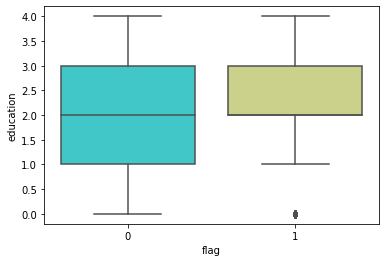

In [ ]:
sns.boxplot(x='flag',y='education',data=data ,palette='rainbow')

Text(0, 0.5, 'Frequency')

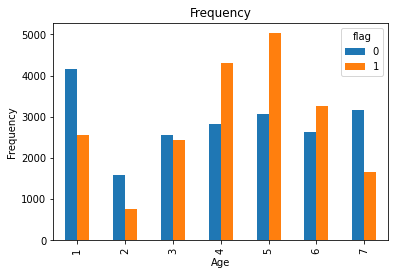

In [ ]:
pd.crosstab(data.age,data.flag).plot(kind='bar')
plt.title('Frequency')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

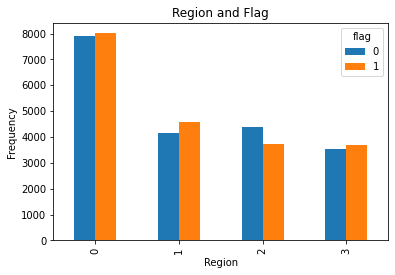

In [ ]:
pd.crosstab(data.region, data.flag).plot(kind='bar')
plt.title('Region and Flag')
plt.xlabel('Region')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

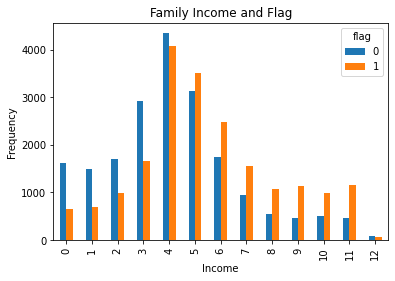

In [ ]:
pd.crosstab(data.fam_income, data.flag).plot(kind='bar')
plt.title('Family Income and Flag')
plt.xlabel('Income')
plt.ylabel('Frequency')

In [ ]:
figure = px.histogram(data, x = "education",
                      color = "flag",
                      title= "Predicting the Purchase by Education")
figure.show()

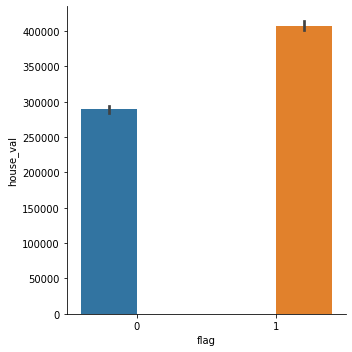

In [ ]:
sns.catplot(data= data, x="flag", y="house_val", hue="flag", kind="bar")

Text(0, 0.5, 'Frequency')

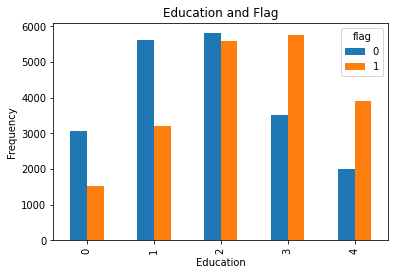

In [ ]:

pd.crosstab(data.education, data.flag).plot(kind='bar')
plt.title('Education and Flag')
plt.xlabel('Education')
plt.ylabel('Frequency')

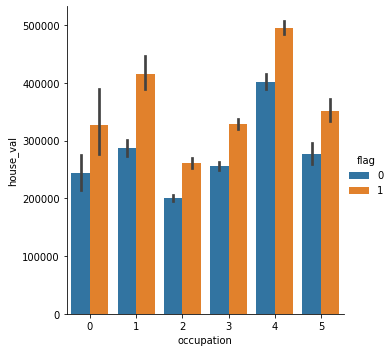

In [ ]:
sns.catplot(data= data, x="occupation", y="house_val", hue="flag", kind="bar")

Text(0, 0.5, 'Frequency')

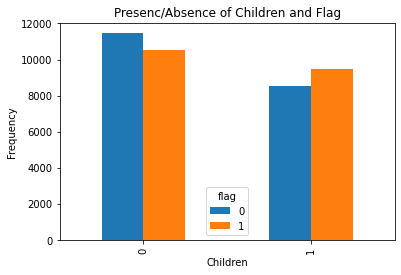

In [ ]:

pd.crosstab(data.child, data.flag).plot(kind='bar')
plt.title('Presenc/Absence of Children and Flag')
plt.xlabel('Children')
plt.ylabel('Frequency')

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



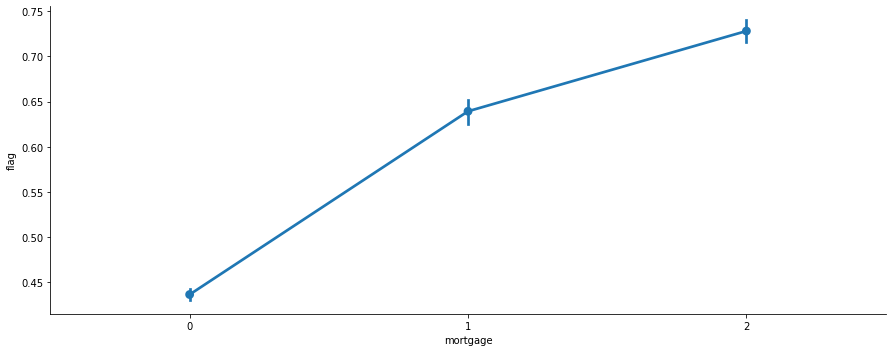

In [ ]:
axes = sns.factorplot('mortgage','flag',
                      data= data , aspect = 2.5, )

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



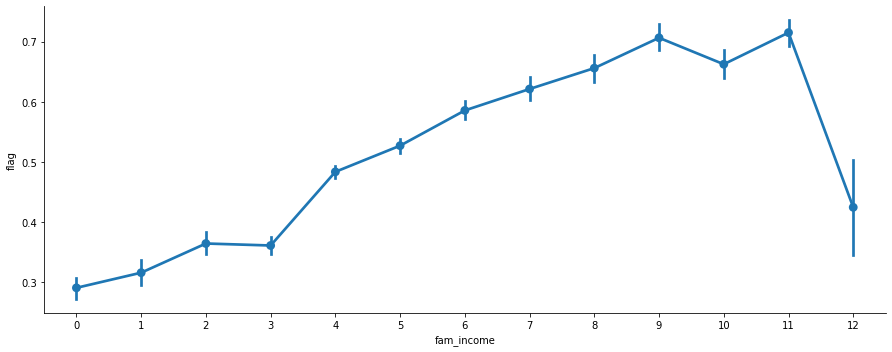

In [ ]:
axes = sns.factorplot('fam_income','flag',
                      data= data , aspect = 2.5, )

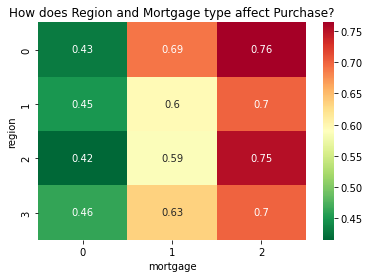

In [ ]:
## Create pivot table
result = pd.pivot_table(data=data, index='region', columns='mortgage',values='flag')
## create heat map of region vs mortgage vs purchase_rate
sns.heatmap(result, annot=True, cmap = 'RdYlGn_r').set_title('How does Region and Mortgage type affect Purchase?')
plt.show()

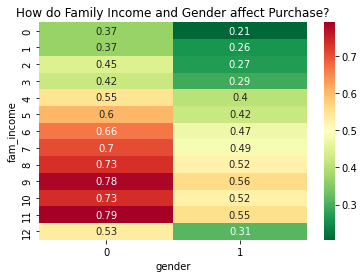

In [ ]:
## Create pivot table
result = pd.pivot_table(data=data, index='fam_income', columns='gender',values='flag')
## create heat map of family income vs gender vs subscription_rate
sns.heatmap(result, annot=True, cmap = 'RdYlGn_r').set_title('How do Family Income and Gender affect Purchase?')
plt.show()

In [ ]:
#crate a correlation matrix after visualisation
datacorr = pd.DataFrame(data)
corr_matrix = data.corr()
print(corr_matrix)

                 flag    gender  education  house_val       age  marriage  \
flag         1.000000 -0.187774   0.235456   0.147852  0.067677  0.168818   
gender      -0.187774  1.000000  -0.079444  -0.066907  0.036728 -0.093563   
education    0.235456 -0.079444   1.000000   0.219883  0.097510  0.133179   
house_val    0.147852 -0.066907   0.219883   1.000000  0.050022  0.084846   
age          0.067677  0.036728   0.097510   0.050022  1.000000  0.208038   
marriage     0.168818 -0.093563   0.133179   0.084846  0.208038  1.000000   
child        0.046329  0.015008  -0.006809   0.016074 -0.149203  0.093031   
occupation   0.206277  0.007523   0.256756   0.148079 -0.231376  0.063506   
mortgage     0.218898 -0.087671   0.213293   0.297825  0.013873  0.152596   
house_owner  0.127270 -0.031781   0.120131   0.100361  0.200975  0.204451   
region      -0.009174  0.003841   0.017032   0.013513  0.007697 -0.025827   
fam_income   0.233016 -0.084738   0.303341   0.363767  0.086916  0.181002   

In [ ]:
rs = np.random.RandomState(0)
dc = pd.DataFrame(rs.rand(10, 10))
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,flag,gender,education,house_val,age,marriage,child,occupation,mortgage,house_owner,region,fam_income
flag,1.000000,-0.187774,0.235456,0.147852,0.067677,0.168818,0.046329,0.206277,0.218898,0.127270,-0.009174,0.233016
gender,-0.187774,1.000000,-0.079444,-0.066907,0.036728,-0.093563,0.015008,0.007523,-0.087671,-0.031781,0.003841,-0.084738
education,0.235456,-0.079444,1.000000,0.219883,0.097510,0.133179,-0.006809,0.256756,0.213293,0.120131,0.017032,0.303341
house_val,0.147852,-0.066907,0.219883,1.000000,0.050022,0.084846,0.016074,0.148079,0.297825,0.100361,0.013513,0.363767
age,0.067677,0.036728,0.097510,0.050022,1.000000,0.208038,-0.149203,-0.231376,0.013873,0.200975,0.007697,0.086916
marriage,0.168818,-0.093563,0.133179,0.084846,0.208038,1.000000,0.093031,0.063506,0.152596,0.204451,-0.025827,0.181002
child,0.046329,0.015008,-0.006809,0.016074,-0.149203,0.093031,1.000000,0.074228,0.135712,-0.012594,-0.032953,0.063886
occupation,0.206277,0.007523,0.256756,0.148079,-0.231376,0.063506,0.074228,1.000000,0.186662,0.050679,-0.007970,0.236152
mortgage,0.218898,-0.087671,0.213293,0.297825,0.013873,0.152596,0.135712,0.186662,1.000000,0.329690,-0.033660,0.345930
house_owner,0.127270,-0.031781,0.120131,0.100361,0.200975,0.204451,-0.012594,0.050679,0.329690,1.000000,-0.011962,0.249287


In [ ]:
scale = StandardScaler()


In [ ]:
X = data[['house_val']]

data['house_val']= scale.fit_transform(X)

In [ ]:
print(data)

       flag  gender  education  house_val  age  marriage  child  occupation  \
0         1       0          4   1.019655    1         0      0           4   
1         0       1          3  -0.338425    7         0      0           4   
2         0       0          2  -0.593459    2         0      1           4   
3         1       0          2   0.013988    2         0      0           3   
4         1       1          2  -0.578610    1         1      1           3   
...     ...     ...        ...        ...  ...       ...    ...         ...   
39995     1       1          3  -0.334173    7         0      0           1   
39996     0       1          1  -0.337363    4         1      0           2   
39997     1       0          0  -0.536157    3         1      0           3   
39998     0       0          1   0.134123    7         0      1           3   
39999     0       1          3   1.218560    7         1      0           1   

       mortgage  house_owner  region  fam_income  


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix, classification_report



In [ ]:
y = data.flag
x = data.drop('flag', axis=1)
# implementing train-test-split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 23)


In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
Y_pred = logreg.predict(x_test)
acc_log = round(logreg.score(x_train, y_train) * 100, 2)
acc_log

66.26

In [ ]:
print(classification_report(y_test, Y_pred))
print(confusion_matrix(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.66      0.69      0.68      3987
           1       0.68      0.65      0.66      4013

    accuracy                           0.67      8000
   macro avg       0.67      0.67      0.67      8000
weighted avg       0.67      0.67      0.67      8000

[[2757 1230]
 [1423 2590]]


In [ ]:
lg_cv_score = cross_val_score(logreg, x, y, cv=10, scoring= "roc_auc").mean()
print(lg_cv_score)
print('\n')

0.7245111875




In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
Y_pred = rf.predict(x_test)
acc_rf = round(rf.score(x_train, y_train) * 100, 2)
acc_rf

98.92

In [ ]:
print(classification_report(y_test, Y_pred))
print(confusion_matrix(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.64      0.65      0.65      3987
           1       0.65      0.64      0.65      4013

    accuracy                           0.65      8000
   macro avg       0.65      0.65      0.65      8000
weighted avg       0.65      0.65      0.65      8000

[[2581 1406]
 [1427 2586]]


In [ ]:
#cross validation
rf_cv_score = cross_val_score(rf, x, y, cv=10, scoring= "roc_auc").mean()
print(rf_cv_score)
print('\n')

0.7021621625




In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
Y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

98.92

In [ ]:
print(classification_report(y_test, Y_pred))
print(confusion_matrix(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.58      0.58      0.58      3987
           1       0.58      0.58      0.58      4013

    accuracy                           0.58      8000
   macro avg       0.58      0.58      0.58      8000
weighted avg       0.58      0.58      0.58      8000

[[2331 1656]
 [1684 2329]]


In [ ]:
decision_cv_score = cross_val_score(decision_tree, x, y, cv=10, scoring= "roc_auc").mean()
print(decision_cv_score)
print('\n')

0.5855000875




In [ ]:
svc = SVC()
svc.fit(x_train, y_train)
Y_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_train, y_train) * 100, 2)
acc_svc

67.81

In [ ]:
print(classification_report(y_test, Y_pred))
print(confusion_matrix(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.67      0.68      0.68      3987
           1       0.68      0.66      0.67      4013

    accuracy                           0.67      8000
   macro avg       0.67      0.67      0.67      8000
weighted avg       0.67      0.67      0.67      8000

[[2722 1265]
 [1351 2662]]
